# Introduction

## **Luthfi Nadyan Putra**
___

URL Link for Tableau Dashboard: [Link Dashboard Tableau](https://public.tableau.com/app/profile/luthfi.nadyan.putra/viz/Dashboard_17478305213680/VisualizationDashboard?publish=yes) 
___

# Milestone 1: Revenue Improvement with Pricing Strategies of Applying Discounts Based Strategies

## Background: 
As one of Data Analyst from Pricing Strategies Department of top E-Commerce company the company's shareholders wants to know about the revenue generated from popular product and discount categories. Moreover, company wants to improve discount efficiency without losing any revenue in those periode. Therefore, your main objectives is differed from this points below:

1. To increase product's revenue by 10 percent for the next periode.

2. While increase the company's revenue you have to addressed any discount that company has been applied based on payment methods, gain insight on how your going to improve it efficently.

## SMART
Specific: Focusing on revenue by 10% optimizing product pricing, discount strategies, and targeting popular product categories. While increasing revenue, assess and refine discount strategies based on method of the payment used to maintain or even improve revenue by offering competitive deals.

Measurable: Increase in revenue of popular products category by 10%, deciding what promotional strategies to use based on discounts status and the method of payment consumer uses.

Achieveable: Identifying the baseline of current sales performance of top products category with targeted promotion deals (discounted or nondiscounted), based on payment method segmentations.

Relevant: Directly supports business growth, improve product categories sales, and ensures promotional spending leads to sustainable revenue generate.

Time-bound: Achieve this increase within the 3 next months (end of quartile), complete discounts strategy analysis, implements discount improvements for each products category within the last 1 month.

Within the time bound of 4 months (quartile) we need to do analysis within first month to identify the top product categories by revenue performance. The next 2 months, we need to addressed all the factors affecting revenue like discounts price or non-discounts price, and method of payment that consumers uses that correlated to gain insight to create the pricing strategies for implementation. The final month, we need to implementing the pricing strategies and review the performance in the first next quarter.

Problem Statements:

1. Which product categories contribute the most to the top revenue of our company?
2. How the revenue of discounted price vs non-discounted price to revenue by product categories?
3. How the payment method will came along to the revenue of the product category?
4. What is consumer preferences of using the method of payment in our company?
5. Is there significant difference for price discounted vs non-discounted?
6. Is there any significant effect of products category and payment method to the revenue?

## A. Data Exploration

___
First we need to import our dataset to the pandas and do some data exploration based on the information for gaining any insight from it.

### 1. Import Package

In [1]:
# Import the Packages use for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t
import matplotlib.lines as lines
import statsmodels.stats.api as sms # For two way ANOVA
from statsmodels.formula.api import ols # For two way ANOVA

### 2. Data Exploration

In [2]:
# Read the dataset CSV
df = pd.read_csv('ecommerce_dataset_updated.csv')
df.head(10)

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024
5,3fdcdae8,0816ee12-5,Books,241.86,50,120.93,UPI,08-08-2024
6,12772337,d41e0b55-c,Toys,76.91,5,73.06,Credit Card,28-03-2024
7,9f0194af,83b7dc04-5,Sports,213.23,20,170.58,Net Banking,29-05-2024
8,7a8559d8,87c9c896-1,Sports,379.81,5,360.82,Credit Card,26-02-2024
9,8911f0d1,31308875-b,Home & Kitchen,415.36,50,207.68,Net Banking,11-01-2024


In [3]:
# Showing all columns in the dataset
df.columns

Index(['User_ID', 'Product_ID', 'Category', 'Price (Rs.)', 'Discount (%)',
       'Final_Price(Rs.)', 'Payment_Method', 'Purchase_Date'],
      dtype='object')

From the data we gain,
- User Id column that describe User personification in the form of Ids.
- Product id is consists all unique product id in the form of Ids.
- Category is a group of product categories for any particular product ids.
- Price is showing the prices of the unique product ids.
- Discount is showing which product ids have a discounts or not-discounted
- Final Price is given values of prices after discounted (Final Price = Price - (Price*Discounts))
- Payment method is which payment method used in the transaction by the user.
- Purchase date is the date of these product ids been purchased by user ids.

In [4]:
# Call the information of rows and columns consists in the dataframe
df.shape

(3660, 8)

From the dataset inferred that the DataFrame have 3660 rows and 8 columns. We use this dataframe for the analysis based on these rows and columns given by the datasets.

In [5]:
# Gain information for the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


For the information given, in 8 columns consist of 5 object, 2 float, and  1 integer type of datas. Referred from the information there is no null values given in the DataFrame.

## B. Data Preprocessing
___ 

### 1. Duplicate Value and Null Value Checks

In [6]:
# Show if any duplicates value in data frame
df.duplicated().any()

False

In [7]:
# Show any duplicates in the form of value
df.duplicated().sum()

0

Inferred from above information there is no or any duplicate values in the dataframe. Therefore, we okay to go.

In [8]:
# Show any null values in dataset
df.isna().sum()


User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64

For confirming our validation above, I executed once more to show is there any null values in the dataset. Result inferred there is no null values and we okay to go to the next section for checking the values in the columns.

### 2. Data Cleaning

In [9]:
# Rename several columns name and unnecessary whitespace in the columns
df.rename(columns={'Price (Rs.)' : 'Price'}, inplace=True) # Inplace True to read it as string value so it would precisely update the name
df.rename(columns={'Discount (%)' : 'Discounts'}, inplace=True)
df.rename(columns={'Final_Price(Rs.)' : 'Final_Price'}, inplace=True)
df

,User_ID,Product_ID,Category,Price,Discounts,Final_Price,Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024
...,...,...,...,...,...,...,...,...
3655,67abda0a,28714133-6,Beauty,486.79,0,486.79,UPI,14-05-2024
3656,34ebc1a0,08838c2c-9,Toys,212.87,15,180.94,Cash on Delivery,19-11-2024
3657,1defd3b1,c39a4f16-6,Home & Kitchen,389.76,0,389.76,Net Banking,07-08-2024
3658,0611293d,b4f67f96-9,Electronics,447.66,30,313.36,UPI,21-05-2024


In [10]:
# List columns
df.columns.tolist()

['User_ID',
 'Product_ID',
 'Category',
 'Price',
 'Discounts',
 'Final_Price',
 'Payment_Method',
 'Purchase_Date']

We already did to rename the data columns to clean unnecessary string characters.

In [11]:
# Handling the data type for Discounts Columns to be float
df['Discounts'] = df['Discounts']/100
df['Discounts'] = df['Discounts'].astype(float)
df

,User_ID,Product_ID,Category,Price,Discounts,Final_Price,Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,0.15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,0.20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,0.25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,0.25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,0.20,195.84,Net Banking,27-09-2024
...,...,...,...,...,...,...,...,...
3655,67abda0a,28714133-6,Beauty,486.79,0.00,486.79,UPI,14-05-2024
3656,34ebc1a0,08838c2c-9,Toys,212.87,0.15,180.94,Cash on Delivery,19-11-2024
3657,1defd3b1,c39a4f16-6,Home & Kitchen,389.76,0.00,389.76,Net Banking,07-08-2024
3658,0611293d,b4f67f96-9,Electronics,447.66,0.30,313.36,UPI,21-05-2024


In [12]:
# DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User_ID         3660 non-null   object 
 1   Product_ID      3660 non-null   object 
 2   Category        3660 non-null   object 
 3   Price           3660 non-null   float64
 4   Discounts       3660 non-null   float64
 5   Final_Price     3660 non-null   float64
 6   Payment_Method  3660 non-null   object 
 7   Purchase_Date   3660 non-null   object 
dtypes: float64(3), object(5)
memory usage: 228.9+ KB


Now we be good, after the handling we can do much more analysis after we convert discounts value to float and divided by 100. Since we need it later on for analysis, discounts must be in the form of decimal and float type.

## C. Data Analysis
___

### 1. Top Product Categories by Revenue 

#### First we have to know the quantity sold from the data that are not given


In [13]:
# Create new df with group by from the product id
sales = df.groupby('Product_ID').size().reset_index(name='Quantity_Sold')

# Merge on with Product_ID
df_new = df.merge(sales, on='Product_ID')

# Generate new column for Revenue
df_new["Revenue"] = df_new['Final_Price'] * df_new['Quantity_Sold']

df_new

,User_ID,Product_ID,Category,Price,Discounts,Final_Price,Payment_Method,Purchase_Date,Quantity_Sold,Revenue
0,337c166f,f414122f-e,Sports,36.53,0.15,31.05,Net Banking,12-11-2024,1,31.05
1,d38a19bf,fde50f9c-5,Clothing,232.79,0.20,186.23,Net Banking,09-02-2024,1,186.23
2,d7f5f0b0,0d96fc90-3,Sports,317.02,0.25,237.76,Credit Card,01-09-2024,1,237.76
3,395d4994,964fc44b-d,Toys,173.19,0.25,129.89,UPI,01-04-2024,1,129.89
4,a83c145c,d70e2fc6-e,Beauty,244.80,0.20,195.84,Net Banking,27-09-2024,1,195.84
...,...,...,...,...,...,...,...,...,...,...
3655,67abda0a,28714133-6,Beauty,486.79,0.00,486.79,UPI,14-05-2024,1,486.79
3656,34ebc1a0,08838c2c-9,Toys,212.87,0.15,180.94,Cash on Delivery,19-11-2024,1,180.94
3657,1defd3b1,c39a4f16-6,Home & Kitchen,389.76,0.00,389.76,Net Banking,07-08-2024,1,389.76
3658,0611293d,b4f67f96-9,Electronics,447.66,0.30,313.36,UPI,21-05-2024,1,313.36


Because we want to know the revenue for top categories we need to get the unique value in Category columns.

In [14]:
# Get the unique value in Category column
df_new['Category'].unique().tolist()

['Sports',
 'Clothing',
 'Toys',
 'Beauty',
 'Books',
 'Home & Kitchen',
 'Electronics']

There is 6 Category in product sold and this list are going to use as the based for the visualization of Top Generating Revenue by Categories Group.

#### a. Histogram Bar per Product Category

In [15]:
# Were going to show overall product categories revenue with stacked bar 

# New Variable only for Revenue
prod_cat_rev = df_new.groupby(by=['Category'], as_index=False).agg({"Revenue": "sum"}).sort_values(by='Revenue', ascending=False)[:7]

prod_cat_userid = df_new.groupby(by=['Category'], as_index=False).agg({"User_ID":"count"}).sort_values(by='User_ID', ascending=False) [:7]

# Variable for Revenue and User_Id (count)
prod_cat_comp = df_new.groupby(by=['Category'], as_index=False).agg({"Revenue": "sum", "User_ID":"count"}).sort_values(by='Revenue', ascending=False)[:7]
prod_cat_comp

,Category,Revenue,User_ID
2,Clothing,115314.84,531
1,Books,111149.35,534
4,Home & Kitchen,110328.08,549
5,Sports,108518.79,520
6,Toys,107289.69,523
0,Beauty,104215.10,505
3,Electronics,100462.23,498


The column consist of the sum of Revenue and the Count of User_ID that has been spending (doing transaction) for these particular products category.

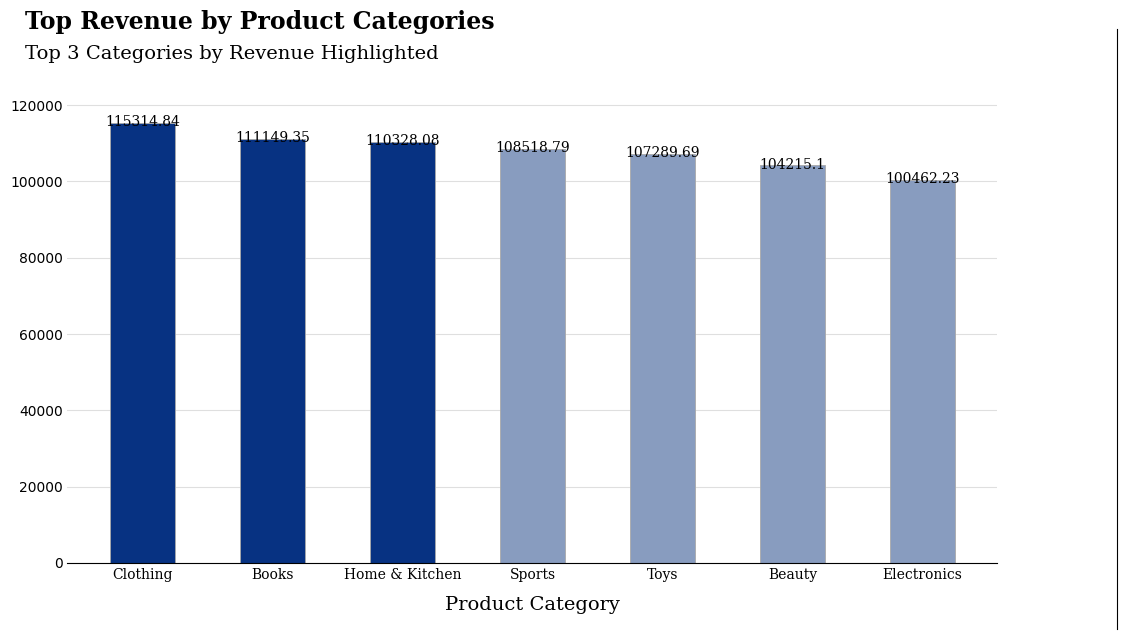

In [16]:
# Plot The Color Map
color_map = ["#889cbf" for _ in range(len(prod_cat_comp))]
color_map[0] = color_map[1] = color_map[2] = "#073282" # for color highlight

# Set the subplots
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(prod_cat_comp['Category'], prod_cat_comp['Revenue'], width=0.5,
       edgecolor = 'darkgray',
       linewidth = 0.6, color=color_map)  # axis setting for the bar for column Category and Revenue

# Annotations
for i in range(len(prod_cat_comp)):    # let the range access through loop for all range of columns in prod_cat_comp df
    ax.annotate(f"{prod_cat_comp['Revenue'].iloc[i]}", # using iloc to access and iterate the index in those particular columns 
                xy=(prod_cat_comp['Category'].iloc[i], prod_cat_comp['Revenue'].iloc[i] + 150), # creating the axis x and y the use of iloc is to 
                                                                                                # iterate the same rows from each column so the data dont overlapping
                va = 'center', ha='center', fontweight='light', fontfamily = 'serif')
    
# Remove border from the plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Tick labels
ax.set_xticks(np.arange(len(prod_cat_comp)))
ax.set_xticklabels(prod_cat_comp['Category'], fontfamily='serif', rotation=0)

# Title and sub-title
fig.text(0.09, 1, 'Top Revenue by Product Categories', fontsize=17, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Top 3 Categories by Revenue Highlighted', fontsize=14, fontweight='light', fontfamily='serif')

# Axis Settings for the graph
ax.grid(axis='y', linestyle='-', alpha = 0.4)
ax.set_yticks(np.arange(0, 130_000, 20_000))
ax.set_axisbelow(True)

# Set axis title
plt.xlabel("Product Category", fontsize=14, fontweight='light', fontfamily='serif',loc='center', labelpad=10)

# Import lines for background lines of the bar
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black',lw=0.8)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

From this plot we know which category are the top amongs others product category. I highlighted top 3 categories that shown on the bar above. Clothing seems to be the most revenue generated products with 115,314 value within its revenue follow by Books and Home & Kitchen (highlight by darker colour palettes). It seems Clothing, Books, Home & Kitchen utensils are fast moving goods in our company's.

- Source code reference: Kaggle.com | Joshuaswords | Netflix Data Visualization
- Link Notebook: https://www.kaggle.com/code/joshuaswords/netflix-data-visualization/notebook

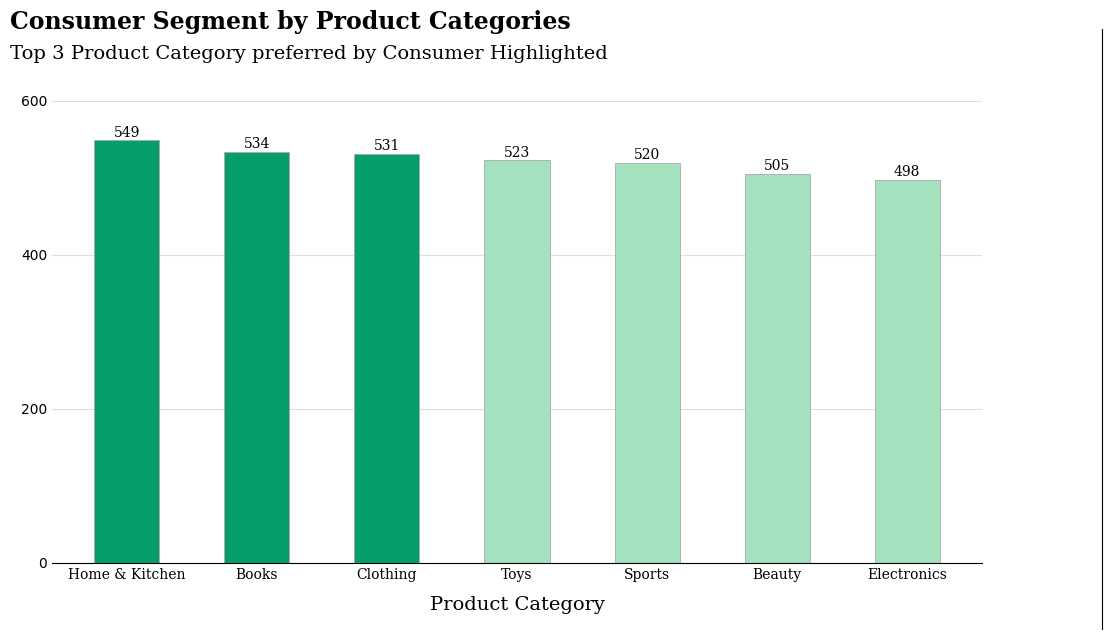

In [17]:
# Second plot for User_Id
# Plot The Color Map
color_map = ["#a4e1bf" for _ in range(len(prod_cat_userid))]
color_map[0] = color_map[1] = color_map[2] = "#049E6B" # for color highlight

# Set the subplots
fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(prod_cat_userid['Category'], prod_cat_userid['User_ID'], width=0.5,
       edgecolor = 'darkgray',
       linewidth = 0.6, color=color_map) # axis setting for the bar for column Category and User_ID

# Annotations
for i in range(len(prod_cat_userid)):                    # let the range access through loop for all range of columns in prod_cat_comp df
    ax.annotate(f"{prod_cat_userid['User_ID'].iloc[i]}", # using iloc to access and iterate the index in those particular columns
                xy=(prod_cat_userid['Category'].iloc[i], prod_cat_userid['User_ID'].iloc[i] + 10), # creating the axis x and y the use of iloc is to 
                                                                                                # iterate the same rows from each column so the data dont overlapping
                va = 'center', ha='center', fontweight='light', fontfamily = 'serif')
    
# Remove border from the plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Tick labels
ax.set_xticks(np.arange(len(prod_cat_userid)))
ax.set_xticklabels(prod_cat_userid['Category'], fontfamily='serif', rotation=0)

# Title and sub-title
fig.text(0.09, 1, 'Consumer Segment by Product Categories', fontsize=17, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Top 3 Product Category preferred by Consumer Highlighted', fontsize=14, fontweight='light', fontfamily='serif')

# Axis Settings
ax.grid(axis='y', linestyle='-', alpha = 0.4)
ax.set_yticks(np.arange(0, 700, 200))
ax.set_axisbelow(True)

# Set axis title
plt.xlabel("Product Category", fontsize=14, fontweight='light', fontfamily='serif',loc='center', labelpad=10)

# Import lines for background lines of the bar
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig, color='black',lw=0.8)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

Inferred from the graph, for product categories group by consumer segmentation Home & Kitchen is the popular product that consumer preferred follow by Books and Clothing (indicates by darker colour palletes). Based on the description it differed from revenue segmentation this graph that revenue doesn't reflects product popularism. Although, the transaction value for the top categories is not related to each other. Take an example, if we look upon product category named Home & Kitchen we know that those category is not the highest gross sales and only take number 3 place. Instead, if we look into the transactions made by user those category is the most highly or popular among the dataset. We are going to express it in the form of graph later on and extract what affecting factor behind it.

- Source code reference: Kaggle.com | Joshuaswords | Netflix Data Visualization
- Link Notebook: https://www.kaggle.com/code/joshuaswords/netflix-data-visualization/notebook

#### b. Pie Chart for Percentage for Revenue and Consumer Segment Contribution

In [18]:
# We are going to extract contribution from the popular product category (percentage)
userid_count = df_new.groupby(by=['Category'], as_index=False).agg({"User_ID":"count"})
userid_count['Percentage_UserID'] = round((userid_count["User_ID"]/len(df_new)) * 100, 2)
userid_pcntg = userid_count.sort_values('Percentage_UserID', ascending=False).reset_index(drop=True)

# Same here for the Revenue
rev_count = df_new.groupby(by=['Category'], as_index=False).agg({"Revenue":"sum"})
grand_tot = df_new["Revenue"].sum()
rev_count['Percentage_Rev'] = round((rev_count["Revenue"]/grand_tot) * 100, 2)
rev_pcntg = rev_count.sort_values('Percentage_Rev', ascending=False).reset_index(drop=True)

# Merge the two
pcntg_all = userid_pcntg.merge(rev_pcntg, on='Category')
pcntg_all = pcntg_all.sort_values('Revenue', ascending=False)
pcntg_all


,Category,User_ID,Percentage_UserID,Revenue,Percentage_Rev
2,Clothing,531,14.51,115314.84,15.23
1,Books,534,14.59,111149.35,14.68
0,Home & Kitchen,549,15.00,110328.08,14.57
4,Sports,520,14.21,108518.79,14.33
3,Toys,523,14.29,107289.69,14.17
5,Beauty,505,13.80,104215.10,13.76
6,Electronics,498,13.61,100462.23,13.27


Text(0.5, 1.0, 'Consumers Popularity Contribution by Product Category')

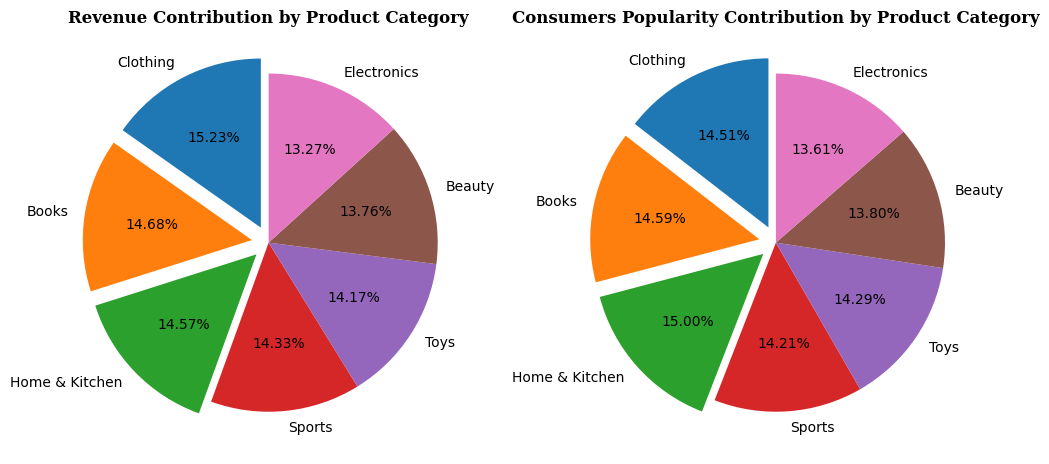

In [19]:
# Define the variable for the data
labels = pcntg_all['Category']
data1 = pcntg_all['User_ID']
data2 = pcntg_all['Revenue']

# Use Explode for highlighting the top 3
explode = [0.1, 0.1, 0.1,] + [0] * (len(labels) - 3) # explode to highlight the top 3 segment, the concept takes a boolean value to execute

# Pie Chart Graph for two rows
fig, ax = plt.subplots(1,2, figsize=(12, 6)) # there are 1 column and 2 rows to graph

# Pie Chart 1 for Revenue Contribution
ax[0].pie(data2, labels=labels, autopct='%.2f%%', startangle=90, explode=explode) # auto pct to auto generate percentage proportion 
ax[0].set_title('Revenue Contribution by Product Category', fontweight='bold', fontfamily='serif')

# Pie Chart 2 for Consumer Contribution
ax[1].pie(data1, labels=labels, autopct='%.2f%%', startangle=90, explode=explode) # auto pct to auto generate percentage proportion 
ax[1].set_title('Consumers Popularity Contribution by Product Category', fontweight='bold', fontfamily='serif')



Looking from the graph we came to the conclusion that is for top product categories for revenue and popularity among the consumer, for products like Clothing, Books, and Home & Kitchen. Inferred for Revenue section, Clothing have the highest percentage contribute for Revenue (15.23%) of all products among the products category. Moreover, by the Consumer popularity for the product category Home & Kitchen have contribute (15%) for all the products. This insight inferred that the company should focus on the 3 top categories (Clothing, Books, and Home & Kitchen) to extend their revenue generation from this e-commerce. Next, we going to do more detailed analysis is it true that this 3 products could improve company's income stream.

### 2. Discounted vs non-discounted by Product Category

In this section first we are going to divide and group product category based on discounted and non-discounted. So we are going to get valuable insight on promotion price settings which product that has good choice to get some price discounted.

In [20]:
# Create new column for discount status
df_new['Discount_Position'] = df_new['Discounts'].apply(lambda x: 'Revenue with Discounts' if x > 0 else 'Revenue Non-Discounts')

# Group by Product Category with Discount Position
rev_group = df_new.groupby(['Category', 'Discount_Position'])['Revenue'].sum().reset_index()

# Make pivoting columms to extract in the same rows for Discount position in columns area
pivot = rev_group.pivot(index='Category', columns='Discount_Position', values='Revenue')
pivot['Sum_Revenue'] = pivot.sum(axis=1)
pivot = pivot.sort_values(by='Sum_Revenue', ascending=False)
pivot

Discount_Position,Revenue Non-Discounts,Revenue with Discounts,Sum_Revenue
Category,,,
Clothing,18645.96,96668.88,115314.84
Books,16824.45,94324.90,111149.35
Home & Kitchen,16723.73,93604.35,110328.08
Sports,18446.98,90071.81,108518.79
Toys,18956.25,88333.44,107289.69
Beauty,16347.75,87867.35,104215.10
Electronics,16558.68,83903.55,100462.23


We already did the pivot to slice and dice revenue data to based on discount position for all products category. From the top 3 Categories we already gain insight of the product is discounts based. Next, we are going to graph with stacked bar to see there is another insight we gain from this.

In [21]:
# Divide the discounts revenue with Sum_Revenue to see the proportions
pivot['Discounted_Revenue %'] = round((pivot['Revenue with Discounts']/pivot['Sum_Revenue']) * 100, 2)
pivot['Non-Discounted_Revenue %'] = round((pivot['Revenue Non-Discounts']/pivot['Sum_Revenue']) * 100 , 2)
pivot

Discount_Position,Revenue Non-Discounts,Revenue with Discounts,Sum_Revenue,Discounted_Revenue %,Non-Discounted_Revenue %
Category,,,,,
Clothing,18645.96,96668.88,115314.84,83.83,16.17
Books,16824.45,94324.90,111149.35,84.86,15.14
Home & Kitchen,16723.73,93604.35,110328.08,84.84,15.16
Sports,18446.98,90071.81,108518.79,83.00,17.00
Toys,18956.25,88333.44,107289.69,82.33,17.67
Beauty,16347.75,87867.35,104215.10,84.31,15.69
Electronics,16558.68,83903.55,100462.23,83.52,16.48


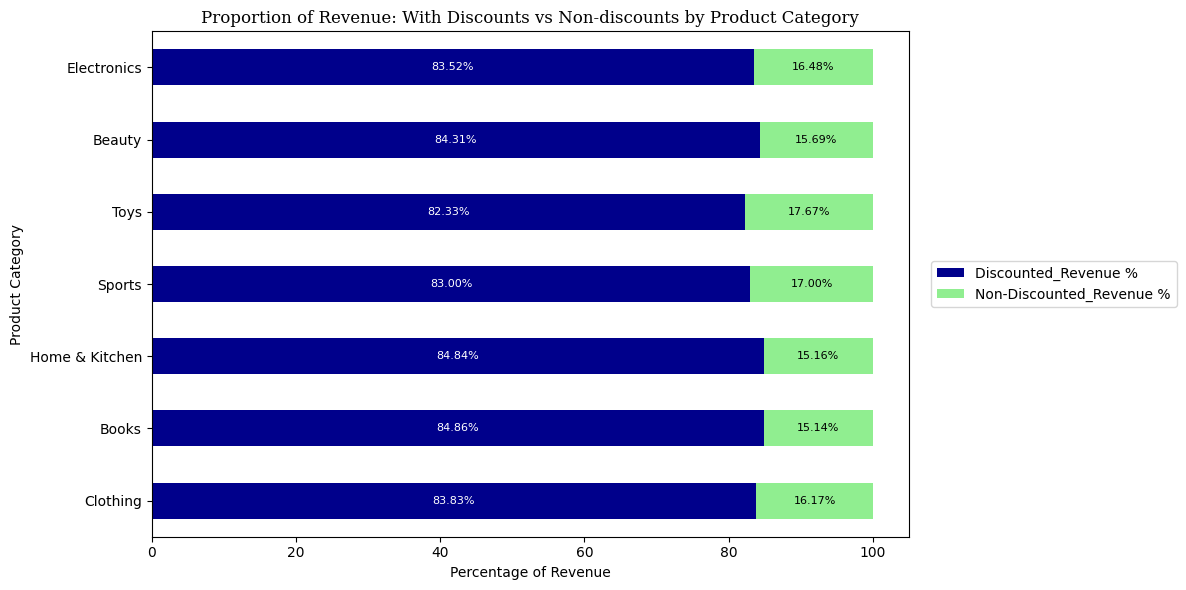

In [22]:
# Now we going to create the stacked bar
ax = pivot[['Discounted_Revenue %', 'Non-Discounted_Revenue %']].plot(
    kind='barh',
    stacked=True,
    figsize=(12,6),
    color=['darkblue', 'lightgreen'],
)
# Add varable axes for determine the colour of two different label
axes = ax.containers

# Add value of the labels
ax.bar_label(axes[0], fmt='%.2f%%', label_type='center', fontsize=8, color='white') # fmt means for the format will follow round of 2 behind the commas
ax.bar_label(axes[1], fmt='%.2f%%', label_type='center', fontsize=8, color='black')

# Additional
plt.ylabel('Product Category')
plt.xlabel('Percentage of Revenue')
plt.legend(['Discounted_Revenue %', 'Non-Discounted_Revenue %'], loc='center left', bbox_to_anchor=(1.02, 0.5)) # bbox to anchor to set the location set for the legend following the pixels
plt.title('Proportion of Revenue: With Discounts vs Non-discounts by Product Category', fontfamily='serif')
plt.tight_layout()
plt.show()

Shown from the bar the for the discounted price across all products category have really high proportion for the revenue and explicitly show that the company really depends on price discounted on generating high revenue. While, the non discounted price only affecting on sports and toys products category but not really that high. Call back from the top 3 (Clothing, Books, and Home & Kitchen), the company seems to set the price discounts heavily for those products category. Therefore, we came to conclusion that discounted price mainly playing roles in revenue streams.

### 3. Which payment method for revenue in discounted category is the highest in each Product Category

Is it payment method will give new additional insight for this Product Category and the discounted or non-discounted we will analysis by a graph in this analysis.

In [23]:
# Group by Product Category with Discount Position
paydis_group = df_new.groupby(['Category', 'Payment_Method','Discount_Position'])['Revenue'].sum().reset_index()
pivot2 = paydis_group.pivot(index='Category', columns=['Payment_Method', 'Discount_Position'], values='Revenue')
dis_columns = [col for col in pivot2.columns if col[1]=='Revenue with Discounts']
pivot2 = pivot2[dis_columns]
pivot2

Payment_Method,Cash on Delivery,Credit Card,Debit Card,Net Banking,UPI
Discount_Position,Revenue with Discounts,Revenue with Discounts,Revenue with Discounts,Revenue with Discounts,Revenue with Discounts
Category,,,,,
Beauty,18989.53,15283.86,15172.33,19190.17,19231.46
Books,16849.33,19854.49,19977.79,19182.52,18460.77
Clothing,21680.70,19591.43,18556.61,18202.00,18638.14
Electronics,15257.10,19773.05,15682.35,17334.20,15856.85
Home & Kitchen,19442.22,20398.42,17870.35,18485.28,17408.08
Sports,16430.14,19884.21,20145.73,16163.14,17448.59
Toys,17074.08,18559.54,18281.04,18643.57,15775.21


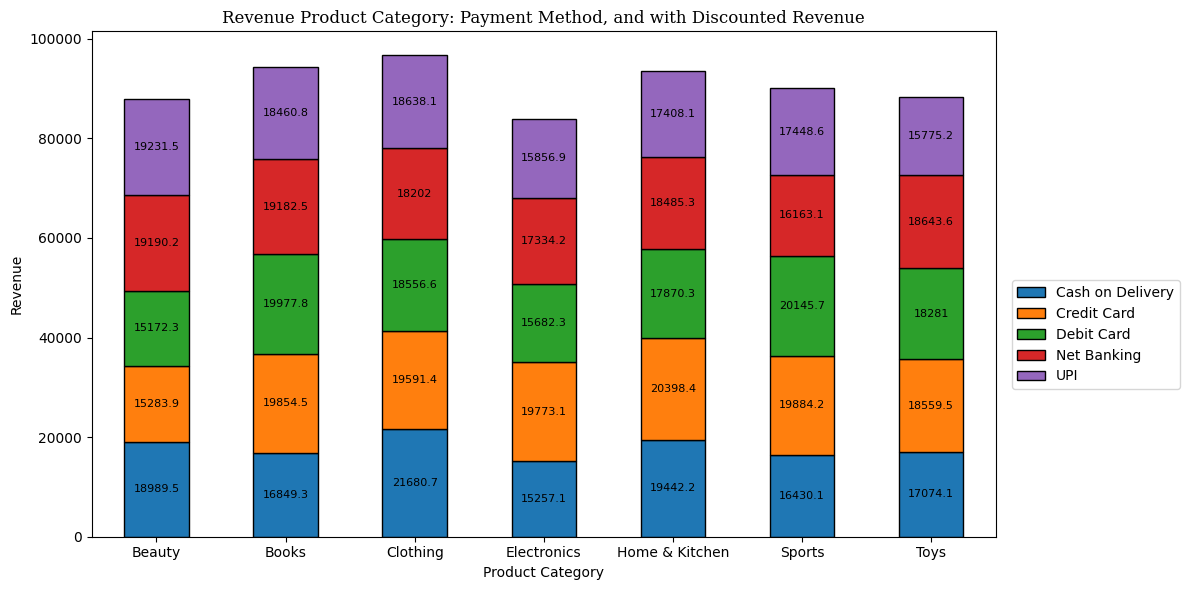

In [24]:
# Stacked Bar 
ax = pivot2.plot(kind='bar', stacked=True, figsize=(12,6), edgecolor='black')

# Add varable axes for determine the values by percent
axes = ax.containers

# For all legends values
ax.bar_label(axes[0], label_type='center', fontsize=8, color='black')
ax.bar_label(axes[1], label_type='center', fontsize=8, color='black')
ax.bar_label(axes[2], label_type='center', fontsize=8, color='black')
ax.bar_label(axes[3], label_type='center', fontsize=8, color='black')
ax.bar_label(axes[4], label_type='center', fontsize=8, color='black')

# Additional
plt.title('Revenue Product Category: Payment Method, and with Discounted Revenue', fontfamily = 'serif')
plt.ylabel('Revenue')
plt.xlabel('Product Category')
plt.xticks(rotation=0)

# Add Legends
plt.legend(['Cash on Delivery', 'Credit Card', 'Debit Card', 'Net Banking', 'UPI'], loc='center left', bbox_to_anchor=(1.01, 0.4))

plt.tight_layout()
plt.show()


We can inferred the graph by using this subpoint below,
- for payment method UPI heavily playing roles in Clothing category revenue stream after discounted, followed by Home & Kitchen and Beauty Category
- for Credit Card the most highest transaction (revenue) after discounted is in Home & Kitchen category followed by Books and Sports.
- for Debit Card has the most revenue generated for price after discounted Sports is the product category that has the highest amount for revenue generating, and follow by Books and Clothing.
- for Net Banking the highest amount of revenue generating is Beauty category followed by Books and Toys category.
- for Cash on Delivery the highest amount of product category holds by Beauty category followed by Clothing and Books.

So now we came to conclusion we already divide the revenue per segments and we hold our analysis based on the Payment Method and each Product Category after discounted price.

### 4. Consumer Preference of Spending using Payment Methods with Revenue

In this section we want to know how distributed of consumer preference of using payment method in the discounted prices. I sum up al product category for this and only payment method that going to be checked.

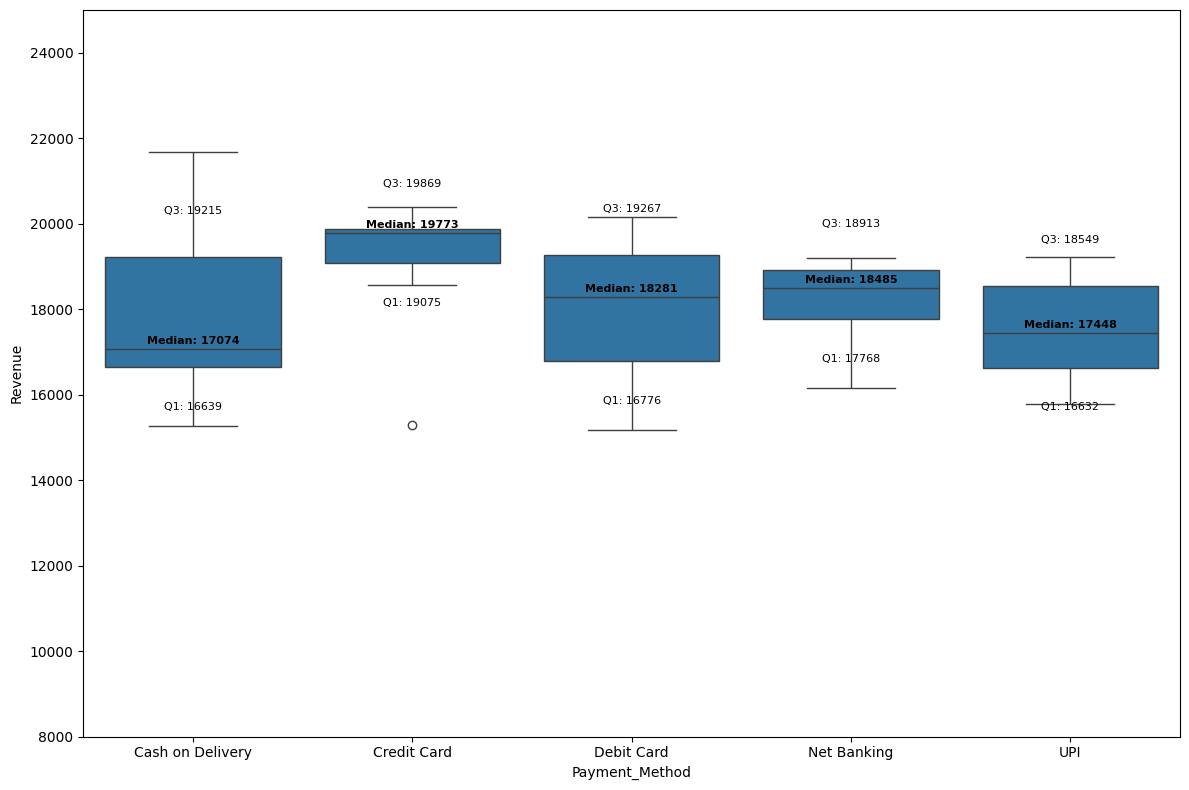

In [25]:
# Create new variable for filtered only Revenue with Discounts only
paydis_group2 = paydis_group[paydis_group['Discount_Position'] == 'Revenue with Discounts']

# Create boxplot between Revenue and Payment Methods
var = 'Payment_Method'
data = pd.concat([paydis_group2['Revenue'], paydis_group2[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Revenue", data=data)
fig.axis(ymin=8000, ymax=25000) # set axis value the range starts from 8000 to 25000

# Calculate the median and IQR manually and annotation
for i, method in enumerate (data[var].unique()):
    data_grup = data[data[var] == method] ['Revenue']
    median = data_grup.median()
    q1 = data_grup.quantile(0.25)
    q3 = data_grup.quantile(0.75)

    # The median annotation
    plt.text(i, median + 120, f"Median: {int(median)}",
             ha='center', color='black', fontsize=8, fontweight='bold')
    
    # The IQR Annotation
    plt.text(i, q1 - 1000, f"Q1: {int(q1)}", ha='center', fontsize=8, color='black')
    plt.text(i, q3 + 1000, f"Q3: {int(q3)}", ha='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()
    

For this Boxplot Graph Analysis, narrower box means there is some consistent behaviour of consumer spending using this particular (e.g. Credit Card, Net Banking, UPI) payment method. While Cash on Delivery, and Debit Card has significant variability of consumer's spending behaviour, and tend to be more inconsistent. Implicitly, if we seek which payment methods for most generating revenue is Credit Card and is followed by UPI. When discounts are applied the median of the data of the Credit Card payment method generally the highest. Following the central tendency theory, when the median of a feature is more higher than the other feature means the range of the values within it by default is more higher and consistent compare to the other even the other features has more higher max value. Thus, it form a conclusion that payment method for generating revenue more consistently with Credit Card (Higher Median Value means Higher Willingness to Spend). Therefore, it is suggest us that consumers from our company tend to spend their purchase through credit card even if it has been discounted. This insight help us to tailored our promotion strategy based on the usage of the payment methods.

### 5. Inferential Statistics for Price Discounted and non-Discounted

#### a. T-test Statistics
To support our analysis before based on only from descriptive statistics and graph. I suggest to comprehend outr analysis to give more depth I'm going to use t-statistics for comparing difference significancy of price discounted vs non-discounted.

Hypothesis

Question: Is there any significant difference of price discounted and non-discounted? 

- H0 : Price Discounted = Price Non-Discounted
- H1 : Price Discounted != Price Non-Discounted

Hypothesis assumption: if p-value < 0.05 reject the null hypothesis (H0) and accept alternative hypothesis (H1), else (p-value > 0.05) accept the null hypothesis and reject the alternative hypothesis.

In [26]:
# Set variable 
price_before_discount = df_new['Price']
price_after_discount = df_new['Final_Price']

# t-statistik test
t_stat, p_val = stats.ttest_ind(price_before_discount, price_after_discount)
print(f'T-Statistic: {t_stat:.5f}')

if p_val < 0.05:
    print(f'P-value: {p_val:.5f}')
    print("Accept H1 for 95% CI")
    print("Alternative Hypothesis accepted (H1), and reject Null Hypothesis (H0)")
else:
    print(f'P-value: {p_val:.5f}')
    print("Accept H0 for 95% CI")
    print("Alternative Hypothesis rejected (H1), and accept Null Hypothesis (H0)")

T-Statistic: 15.45989
P-value: 0.00000
Accept H1 for 95% CI
Alternative Hypothesis accepted (H1), and reject Null Hypothesis (H0)


After we applied some statistics for hypothesis testing using the t-statistics (0.00000 < 0.05), we accept the alternative hypothesis meaning that there is a difference in the price discounted vs non-discounted. It supported our assumptions from above point that the price after it applied with discounted it affects the volume of the revenue generated. Moreover, explicitly the data from the graph analysis we done before shown that the revenue of discounted products is more higher and more effective to improving our revenue based on products category. From this conclusion, we suppose to focus to improve our promotional pricing strategies for generating more and more revenues.

### 6. ANOVA two-way stats test for payment method and products category to Revenue

Hypothesis:

1. Main effect of Payment Methods to Revenue:
- Null Hypothesis (H0): There is no significance difference between payment method and revenue
- Alternative Hypothesis (H1): There is significance difference between payment method and revenue

2. Main Effect of Products Category to Revenue:
- Null Hypothesis (H0): There is no significance difference between products category and revenue
- Alternative Hypothesis (H1): There is significance difference between products category and revenue

3. Interaction Effect between Payment Method with Products Category:
- Null Hypothesis (H0): There is no interaction effect between payment methods with products category
- Alternative Hypothesis (H1): There is interaction effect between payment methods with products category

In [27]:
# Define the main effect 1, 2 and interaction variables into an variable called the_varables
the_variables = ols('Revenue ~ C(Category) + C(Payment_Method) + C(Category): C(Payment_Method) ',data=df_new).fit()

# Execute the ANOVA two way test
sms.anova_lm(the_variables, typ=2)

,sum_sq,df,F,PR(>F)
C(Category),9.044007e+04,6.0,1.003302,0.421161
C(Payment_Method),2.146138e+04,4.0,0.357125,0.839207
C(Category):C(Payment_Method),5.010175e+05,24.0,1.389516,0.097970
Residual,5.446104e+07,3625.0,NaN,NaN


Information we can take from the ANOVA table above is the main factor 1 (Payment Method) is not significance different across all mean of the revenue overall. Secondly, the main factor 2 (Product Category) is resulting a same result that there is no significance difference from products category to the revenue. It is inferred neither of products category nor payment methods individually affecting the revenue.  Interaction effect is not significance at the 0.05 significance level of alpha (or 95% CI). The interaction effect resulted it will reject our alternative relationship in 95% CI, but it will accept our alternative hypothesis in 90% (0.097970 < 0.10). This implied there is some interaction between products category and payment methods that might influence the revenue, but it is not statistically strong relationship like the 0.05 p-value. Alpha level or significance level of 10% indicates there is moderately or marginally significant of interaction between payment method and products category to the revenue that suggest the effect of payment method may vary depending on the product category. This implied that there is some combination of payment methods and products category that may yields higher revenue than other. It shown in the (Section 3 - 'Which payment method for revenue in discounted category is the highest in each Product Category') that the payment methods is dependent to a specific products category to generate more revenue. This information might give us an insight to gain extra revenue from specific products category. Implicitly, the interactions between products category with the use of payment methods moderatly improve revenue for some product in the category.

## D. Conclusion
___

The analysis reveals that among the products category from total revenue comparison there are top 3 categories that contributing to the company revenue for the most revenue stream. The three categories are Clothing, Books, and Home & Kitchen having contribution of total contribution revenue percentage of 15,23% (Clothing), 14,68% (Books), 14,57% (Home & Kitchen). On the other side, when it's came from consumers popularity by product category point of view of the top three is still the same for products category segments (Clothing, Books, and Home & Kitchen) but more different in the contributions percentage 15% (Home & Kitchen), 14,59% (Books), 14,51% (Clothing). Inferred, the top 3 categories for the most generating revenue and popular amongs the consumers is in those 3 products category. These 3 categories consistently generate higher sales volumes and more transactions values. High dependence on discounted sales across all categories ranging from 82.33% to 84.86%. Top categories with highest discounted revenue are Books (84.86%), Home & Kitchen (84.84%), and Beauty (84.31%). Customers on our e-commerce are highly discount-driven across all product category. Discounting is a universal sales strategy in the company's business model.

Most popular payment methods overall are Credit Card and Debit Card, the most used methods across categories. Cash on Delivery is still strong for Clothing and Beauty, indicating trust or trials concerns. The UPI usage is relatively lower across categories, and it is indicating lower trust for high-value online UPI (Digital Payments) transactions or there is a possibillity of consumers preference for card-based rewards/credit. Books generate the highest total revenue mostly from Debit Card and Net Banking. Meanwhile, Electronics and Home & Kitchen heavily favor Credit Card, possibly due to higher product values and credit incentive. For revenue distribution by payment method, credit cards drive the most consistent and higher revenue. Secondly, Cash on Delivery has the possibility to resulting high revenue but is more volatile. UPI and Net Banking are stable but lean more towards lower revenue ranges. After conducting hypothesis and confirms there is a statistically significant difference between the revenue after price discounted and non-discounted products. The finding align well with the earlier graphical analysis, which visually showed that discounted products generate higher revenue specifically across product categories. This result support promotional pricing is an effective strategy driver of revenue performance.

From ANOVA two-way standpoint it suggest a moderate significant interaction of certain combinations of payment methods and product categories might yield higher revenue. For instance, we already observed that some payment methods outperform others within a spesific products category, implying that the effectiveness of the payment methods can depend on the type of product being sold.

## E. Business Recommendations
___
Referred to the conclusions above there is a several recommendation that can be inferred for business insight strategies as the point below:

- Focus on Discount / Promotional Strategies: 
The company should prioritize promotional pricing, especially on high-performing products category. This could be implement through prioritizing data-driven promotional pricing during campaigns. Moreover, our company have to focus on bundling discount for high demand or fast moving products category. Lastly, it is important to look at product margins to maintain profitability.

- Credit Card Payments Correlate with Higher Revenue per User Transaction:
This spesific payment methods likely to appealsto high-intent buyers or those who purchasing premium products category. Moreover, our company could increase it's exclusivity by collaborate with our banks partner to offer credit card exclusive promotions.

- The matter of Products Category and Payment Method:
There are several products category that generate revenue varies based on spesific combinations, which means there are certain payment methods perform better with certain products category. The company should be focusing to develop category-spesific payment strategies for other products category.

- Refine Cash on Delivery Strategy:
As show from our analysis before, Cash on Delivery shows high revenue variance, and it indicates inconsistency. Cash on Deliver implementation might support a conversion of trust sensitive thus increase a risk. The company must seek some strategies to reduce this potential risk for Cash on Delivery segments. In the other side, the company should applied sort of strategic pricing through behavioral recommendation that aimed at shifting customer preferences of using COD to more prepaid payment methods (e.g. in this context credit card, debit card, UPI, or net banking) via applying cashback, loyalty points, and exclusive deals. 